<a href="https://colab.research.google.com/github/khipucode/data_and_codes_phd/blob/main/3_3_1_2_minima_potencia_DD_MZM_Aa_vs_SD_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import math
import numpy as np     # library for vector operation
from mpmath import *   # library for bessel function
import matplotlib.pyplot as plt
#from pylab import *


# Parâmetros dos moduladores
Vpi_pm1  = 3
Vpi_mz1  = 2.4

ts5 = 2*math.sqrt(5)  # 4.47213

# Potências de entrada em dBm nas portas dos moduladores
Ppm1  = 23;  ang1pm = 0;  Upm1   =  0;     Tpm1  =  (pi*Upm1/Vpi_pm1);    Apm1  = (pi/Vpi_pm1)*10**(Ppm1/20)/ts5

# ------------------------------------No condition
#Pmz1a = 33;  ang1a  = 0;  Umz1a  =  0;   Th1a  =  (pi*Umz1a/Vpi_mz1);   Amz1a = (pi/Vpi_mz1)*10**(Pmz1a/20)/ts5
#Pmz1b = 32;  ang1b  = 0;  Umz1b  =  0;     Th1b  =  (pi*Umz1b/Vpi_mz1);   Amz1b = (pi/Vpi_mz1)*10**(Pmz1b/20)/ts5;
# ------------------------------------MZM flat condition
Pmz1a    = 33;  ang1a  = 0;  Umz1a  =  Vpi_mz1/2;   Th1a  =  (pi*Umz1a/Vpi_mz1);   Amz1a = (pi/Vpi_mz1)*10**(Pmz1a/20)/ts5
Nao_used = 10;  ang1b  = 0;  Umz1b  =  0;           Th1b  =  (pi*Umz1b/Vpi_mz1);   Amz1b = Amz1a - pi/2;
#-------------------------------------

up_n  =  55
up_m  =  67
noise = 10**-10; noise_dBm = 10*log10(noise)

#===============================================================================
#ang1a_n = np.arange(0,pi,0.1)
#f_x     = np.sin(ang1a_n)

#print(ang1a_n)
top_m = int((up_m-1)/2)
ind_m = range(-top_m,top_m+1)

# ===========================================================================

def reduct_vector(up_act, vec_comb, up_new):
 # up_act = tamanho atual do vector vec_comb
 a = int((up_act-up_new)/2)
 b = int(a + up_new)
 c = int((up_new-1)/2)
 ax_rang = range(-c,c+1)
 ax_new = list(ax_rang)
 new_vcomb = []
 for k in range(a,b):
  new_vcomb.append(vec_comb[k])

 return new_vcomb
# ===========================================================================

b = [1,2,1,1,1,1,2,1,2,11,2,1,11,1,2,2,3,3,0]
print(len(b))

b1 = reduct_vector(19,b,7)
print(b1)

up_act      = up_m
length_flat = 11     # quantidade de linhas comparadas
length_matrix = 120 # tamanho maixmo da voltagem multiplicado x 10 em V
limit_axis_xy = length_matrix/10

len_Aa = len(range(3,10))
#mx_st = [[0 for k in range(length_matrix)] for j in range(length_matrix)]
mx_st = np.zeros((len_Aa, length_matrix))

c_Aa      = 0
Abx       = []
SD1       = []
for var_Amz1a in range(3,10):  #(length_matrix):
 #if isinstance(var_Amz1a, int)
 for var_Amz1b in range(length_matrix):
   # var_Amz1b = var_Amz1a - pi/2;
    Vector_mz = []
    flat_cond = []
    temp2     = []
    pente_osa = []

    for m in ind_m:
      J_m_Amz1a = besselj(m,var_Amz1a)
      J_m_Amz1b = besselj(m,var_Amz1b/10)
      temp = J_m_Amz1a*exp(j*(m*ang1a + Th1a)) + J_m_Amz1b*exp(j*(m*ang1b + Th1b))
      Vector_mz.append(temp)

    temp2 = [abs(k2) for k2 in Vector_mz]
    pente_osa = np.square(temp2)
    flat_cond = reduct_vector(up_act, pente_osa, length_flat)
    st_dev = np.std(flat_cond)
    mx_st[c_Aa,var_Amz1b]= st_dev
 c_Aa = c_Aa + 1
#x  = list(range(length_matrix))
#y  = list(range(length_matrix))

ax_1 = np.linspace(0,limit_axis_xy,length_matrix)
ay_1 = np.linspace(0,limit_axis_xy,length_matrix)



'''
plt.rcParams['font.size']=20
plt.figure(figsize=(12,8))
plt.contourf(ax_1, ay_1, mx_st, 200, cmap='RdGy')
plt.colorbar();
plt.xlabel("$A1_a$", fontsize=20)
plt.ylabel("$A1_b$", fontsize=20)

#ax_mz = list(range(up_m))
'''

19
[2, 1, 2, 11, 2, 1, 11]


'\nplt.rcParams[\'font.size\']=20\nplt.figure(figsize=(12,8))\nplt.contourf(ax_1, ay_1, mx_st, 200, cmap=\'RdGy\')\nplt.colorbar();\nplt.xlabel("$A1_a$", fontsize=20)\nplt.ylabel("$A1_b$", fontsize=20)\n\n#ax_mz = list(range(up_m))\n'

[3 4 5 6 7 8 9]


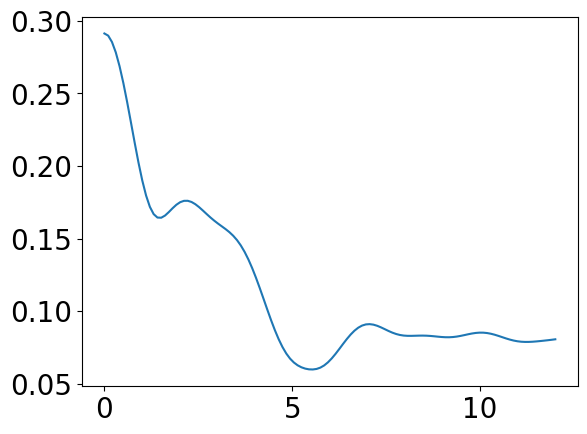

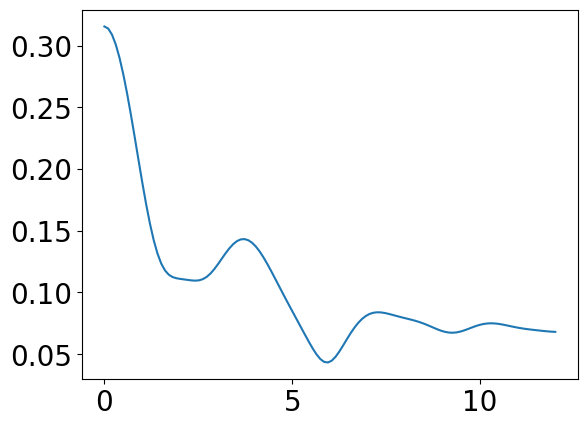

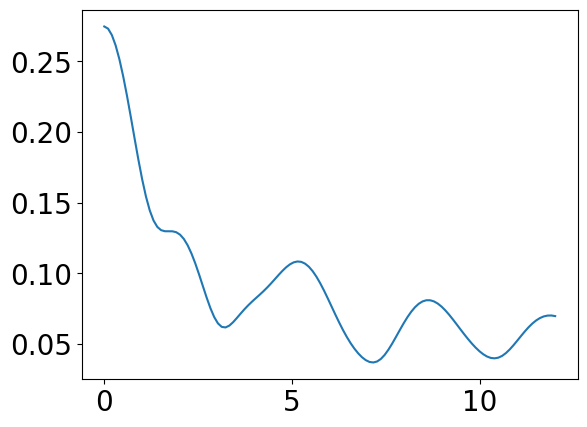

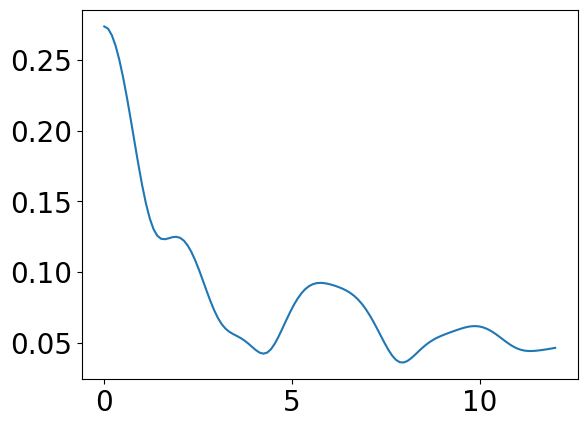

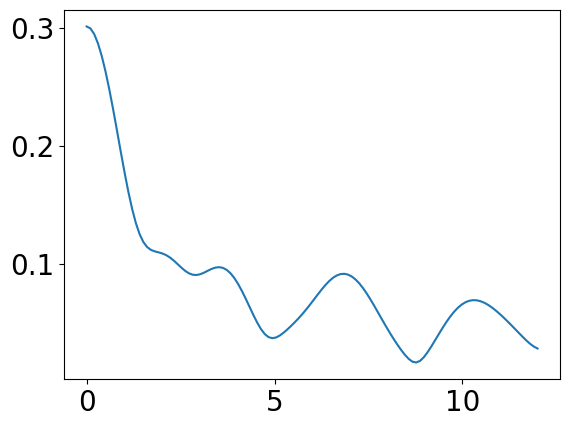

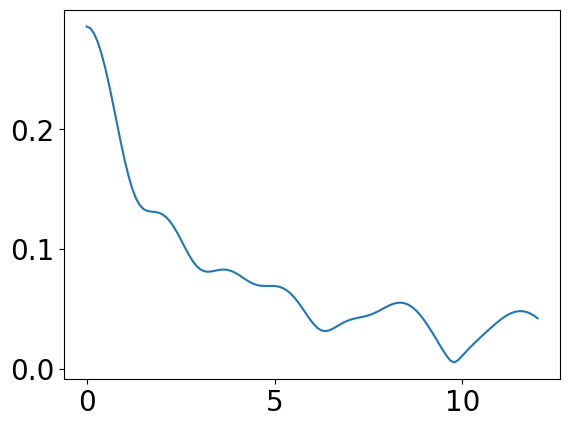

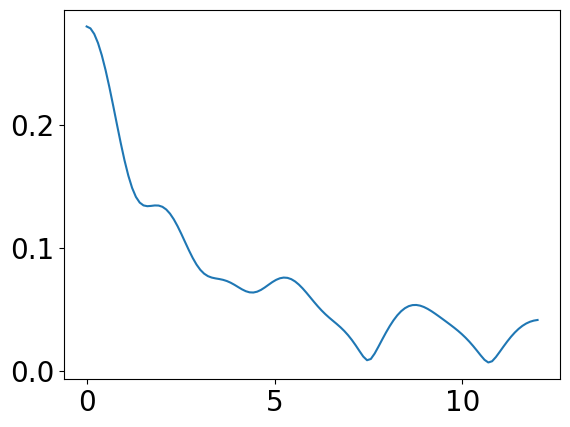

In [22]:
Aax_int = np.array(range(3,10))
print(Aax_int)
cont = 0
for pt in Aax_int:
  plt.plot(ax_1,mx_st[cont,:])
  #ax.title('a')
  plt.show()
  cont = cont + 1

In [11]:
print(mx_st[1,:])

[0.31556759 0.31391053 0.30899027 0.30095847 0.29006425 0.27664895
 0.26113912 0.24403795 0.22591522 0.20739526 0.18914109 0.17183127
 0.1561227  0.14259158 0.13165007 0.12345527 0.1178534  0.11440741
 0.11251339 0.11155458 0.11102792 0.11061213 0.11018192 0.10978566
 0.10959993 0.1098682  0.11083023 0.11265367 0.11538377 0.11892548
 0.12306012 0.12748585 0.13186584 0.13587083 0.13921049 0.14165306
 0.14303537 0.14326591 0.14232267 0.14024724 0.13713576 0.13312744
 0.12839086 0.12310874 0.11746184 0.11161323 0.10569456 0.09979649
 0.09396512 0.08820601 0.08249595 0.07680144 0.07110195 0.06541606
 0.0598289  0.05451969 0.04978437 0.04603614 0.04374585 0.04328815
 0.04474981 0.04786568 0.05214713 0.05706549 0.06216223 0.06708085
 0.07156241 0.07543205 0.07858665 0.08098478 0.08263809 0.0836028
 0.08397039 0.08385678 0.08338997 0.08269659 0.08188859 0.08105166
 0.08023768 0.07946263 0.07871072 0.07794389 0.07711469 0.07618016
 0.07511416 0.07391675 0.07261928 0.07128459 0.07000192 0.06887

In [3]:
print( len(range(3,10)))

7
